## GroupActivity_week15

### What is Class Imbalance?

   * When observation of one class is higher than the observation of other class, there exists class Imbalance. 
   
   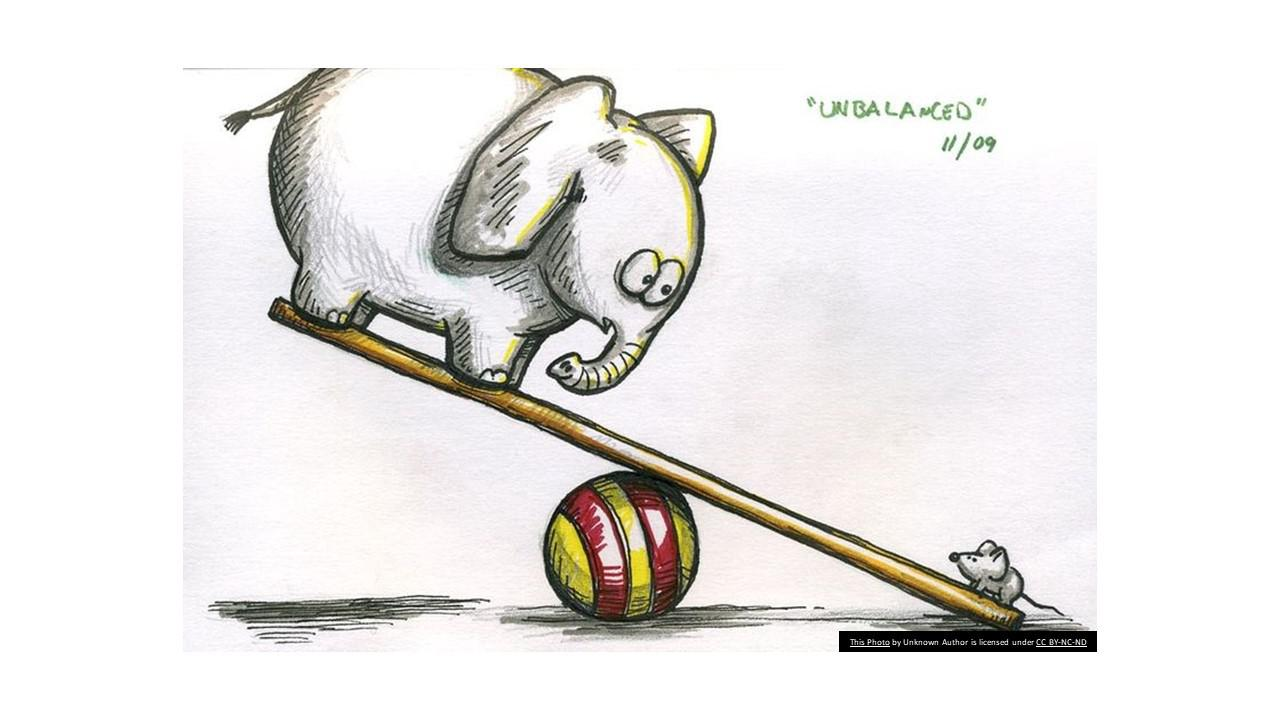
    
#### Why it is important?
 
   * Most Machine Learning Algorithms works best when the number of samples in each class is about equal. If the dataset is imbalance, **we will get high accuracy just by predicting the majority class but our model failed to capture minority class.** 
   

### Techniques for balancing data
#### Resampling

   * One of the technique for dealing class Imbalance is resampling. It consists of two methods.
          
        * removing samples from the majority class **(under sampling)**
        * adding more samples to the minority class **(over sampling)**
                  
                  
   * Random OverSample(ROS) technique creates exact copies of observations which leads to overfitting.
          
#### SMOTE ( Synthetic Minority Oversampling Technique)

   *  SMOTE is an oversampling method which generates samples for minority class as an input.  Unlike ROS, SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. 
   
   * There will be no information loss if we chose over sampling then under sampling.
   
#### How SMOTE works?

Steps:
    
   1. Choose minority class as an input
   2. Find its K nearest neighbors
   3. Generate new samples with the help of interpolation between closer samples.
   4. Repeat the steps until the data is balanced.
   

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
diabetes_df = pd.read_csv('../SupervisedML_13/diabetes.csv')

In [ ]:
# I have performed RFE feature selection method and chose 2 features('Glucose','BMI') as the best features 
# to predict output column. Since we are giving importance to SMOTE, I am just copying the input features,
# performance metrices everything from last week HW. 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,balanced_accuracy_score,recall_score
from imblearn.metrics import classification_report_imbalanced 


In [40]:
X = diabetes_df[['Glucose','BMI']]
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 6, stratify =y)

#standardizing inputs
ss = StandardScaler()
X_tr_scaled = ss.fit_transform(X_train)
X_te_scaled = ss.fit_transform(X_test)

#using counter to see the count of minority class before and after oversampling
counter = Counter(y_train)
print('Before', counter)

# I am going to re-balance the data using SMOTE
smote = SMOTE(random_state =6 )
X_resample, y_resample = smote.fit_resample(X_tr_scaled,y_train)

counter = Counter(y_resample)
print('After', counter)

Before Counter({0: 350, 1: 187})
After Counter({0: 350, 1: 350})


In [39]:
#fitting the model and obtain predictions
model=LogisticRegression()
model.fit(X_resample,y_resample)
y_pred = model.predict(X_te_scaled)
print(classification_report_imbalanced(y_test,y_pred))
print("Accuracy Score: ",balanced_accuracy_score(y_test,y_pred)*100,'%')

                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      0.77      0.67      0.79      0.72      0.52       150
          1       0.61      0.67      0.77      0.64      0.72      0.51        81

avg / total       0.74      0.74      0.70      0.74      0.72      0.52       231

Accuracy Score:  72.0 %


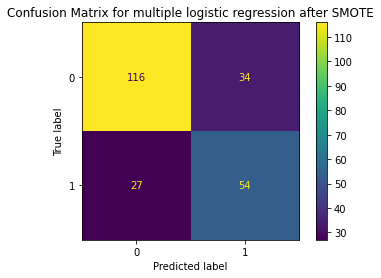

In [32]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.title("Confusion Matrix for multiple logistic regression after SMOTE");

In [27]:
cm=confusion_matrix(y_test,y_pred)
print("No. of False Negatives from Confusion Matrix of Logistic Regression after SMOTE:{}".format(cm[1,0]))
print("Recall Score of Logistic Regression after SMOTE:{}".format(recall_score(y_test,y_pred).round(2)))

No. of False Negatives from Confusion Matrix of Logistic Regression after SMOTE:27
Recall Score of Logistic Regression after SMOTE:0.67


### Comparison

* Out of precison, recall, f1 score performance metrices I am taking recall metrics to compare performance. Since it is diabetes prediction, a person actually have diabetes but False Negative(FN) predicts he is not having diabetes. This causes Type II error and it might leads to that person won't think about diabetes treatment(**but he actually need it**).


                                              Comparing performance 

|       metrics          |      KNN Method    |   LogisticRegression |   Logistic Regression after SMOTE     |
|:----------------------:|:------------------:|:--------------------:|:-------------------------------------:|
| RECALL score           |       0.59         |        0.52          |                 0.67                  |
| No. of False Negatives |        33          |         43           |                  27                   |


* We got accuracy score 72% for this method which is less than other two methods. But it doesn't mean like our model didn't predict well. For those two methods, we got more accuracy score because model predicted based on majority class. 


* For classification models confusion matrix is the best performance metrics to analysis our model than accuracy score.

### Conclusion

* I have performed KNN classification, multiple logistic Regression without SMOTE, multiple logistic regression with SMOTE on diabetes dataset. 
* After resampling technique our recall score for the minority class improved that means number of false negatives reduced. And that is a good sign of improvement. Out of KNN and Logistic Regression, **Logistic Regression with SMOTE performs well**.


### 2. Create a function called rec_digit_sum that takes in an integer. This function is the recursive sum of all the digits in a number. Given n, take the sum of all the digits in n. If the resulting value has more than one digit, continue calling the function in this way until a single-digit number is produced. The input will be a non-negative integer, and this should work for extremely large values as well as for single-digit inputs.

#### Examples:
16 --> 1 + 6 = 7

942 --> 9 + 4 + 2 = 15 --> 1 + 5 = 6

132189 --> 1 + 3 + 2 + 1 + 8 + 9 = 24 --> 2 + 4 = 6

493193 --> 4 + 9 + 3 + 1 + 9 + 3 = 29 --> 2 + 9 = 11 ---> 2

In [34]:
def digit_sum(n):
    
    try:
        if n < 0:
            return "Its negative number"
        elif n < 10:
            return n
        else:
            last_digit = n % 10
            n = int(n / 10)
            return digit_sum(last_digit + digit_sum(n))
        
    except RecursionError as e:
        print(e)
    
print(digit_sum(16))
print(digit_sum(942))
print(digit_sum(132189))
print(digit_sum(493193))

7
6
6
2
